In [ ]:
!pip install geopy

In [ ]:
from geopy.distance import geodesic

# 設定兩個點的經緯度
coords_1 = (12.913041, 77.683237)
coords_2 = (13.043041, 77.813237)

# 計算距離
distance = geodesic(coords_1, coords_2).kilometers  # 或者 .miles

print(distance)


20.143736910348597


In [15]:
import requests

def get_route_distance(start, end):
    # 構建請求URL
    url = f"http://router.project-osrm.org/route/v1/car/{start[1]},{start[0]};{end[1]},{end[0]}?overview=false"

    # 發送請求
    response = requests.get(url)

    # 解析JSON數據
    data = response.json()

    # 返回路徑的距離
    return data['routes'][0]['distance'] / 1000  # 轉換成公里

# 起點和終點經緯度
start_coords = (12.913041, 77.683237)
end_coords = (13.043041, 77.813237)

# 獲取距離
distance = get_route_distance(start_coords, end_coords)
print(distance, "公里")


28.9712 公里


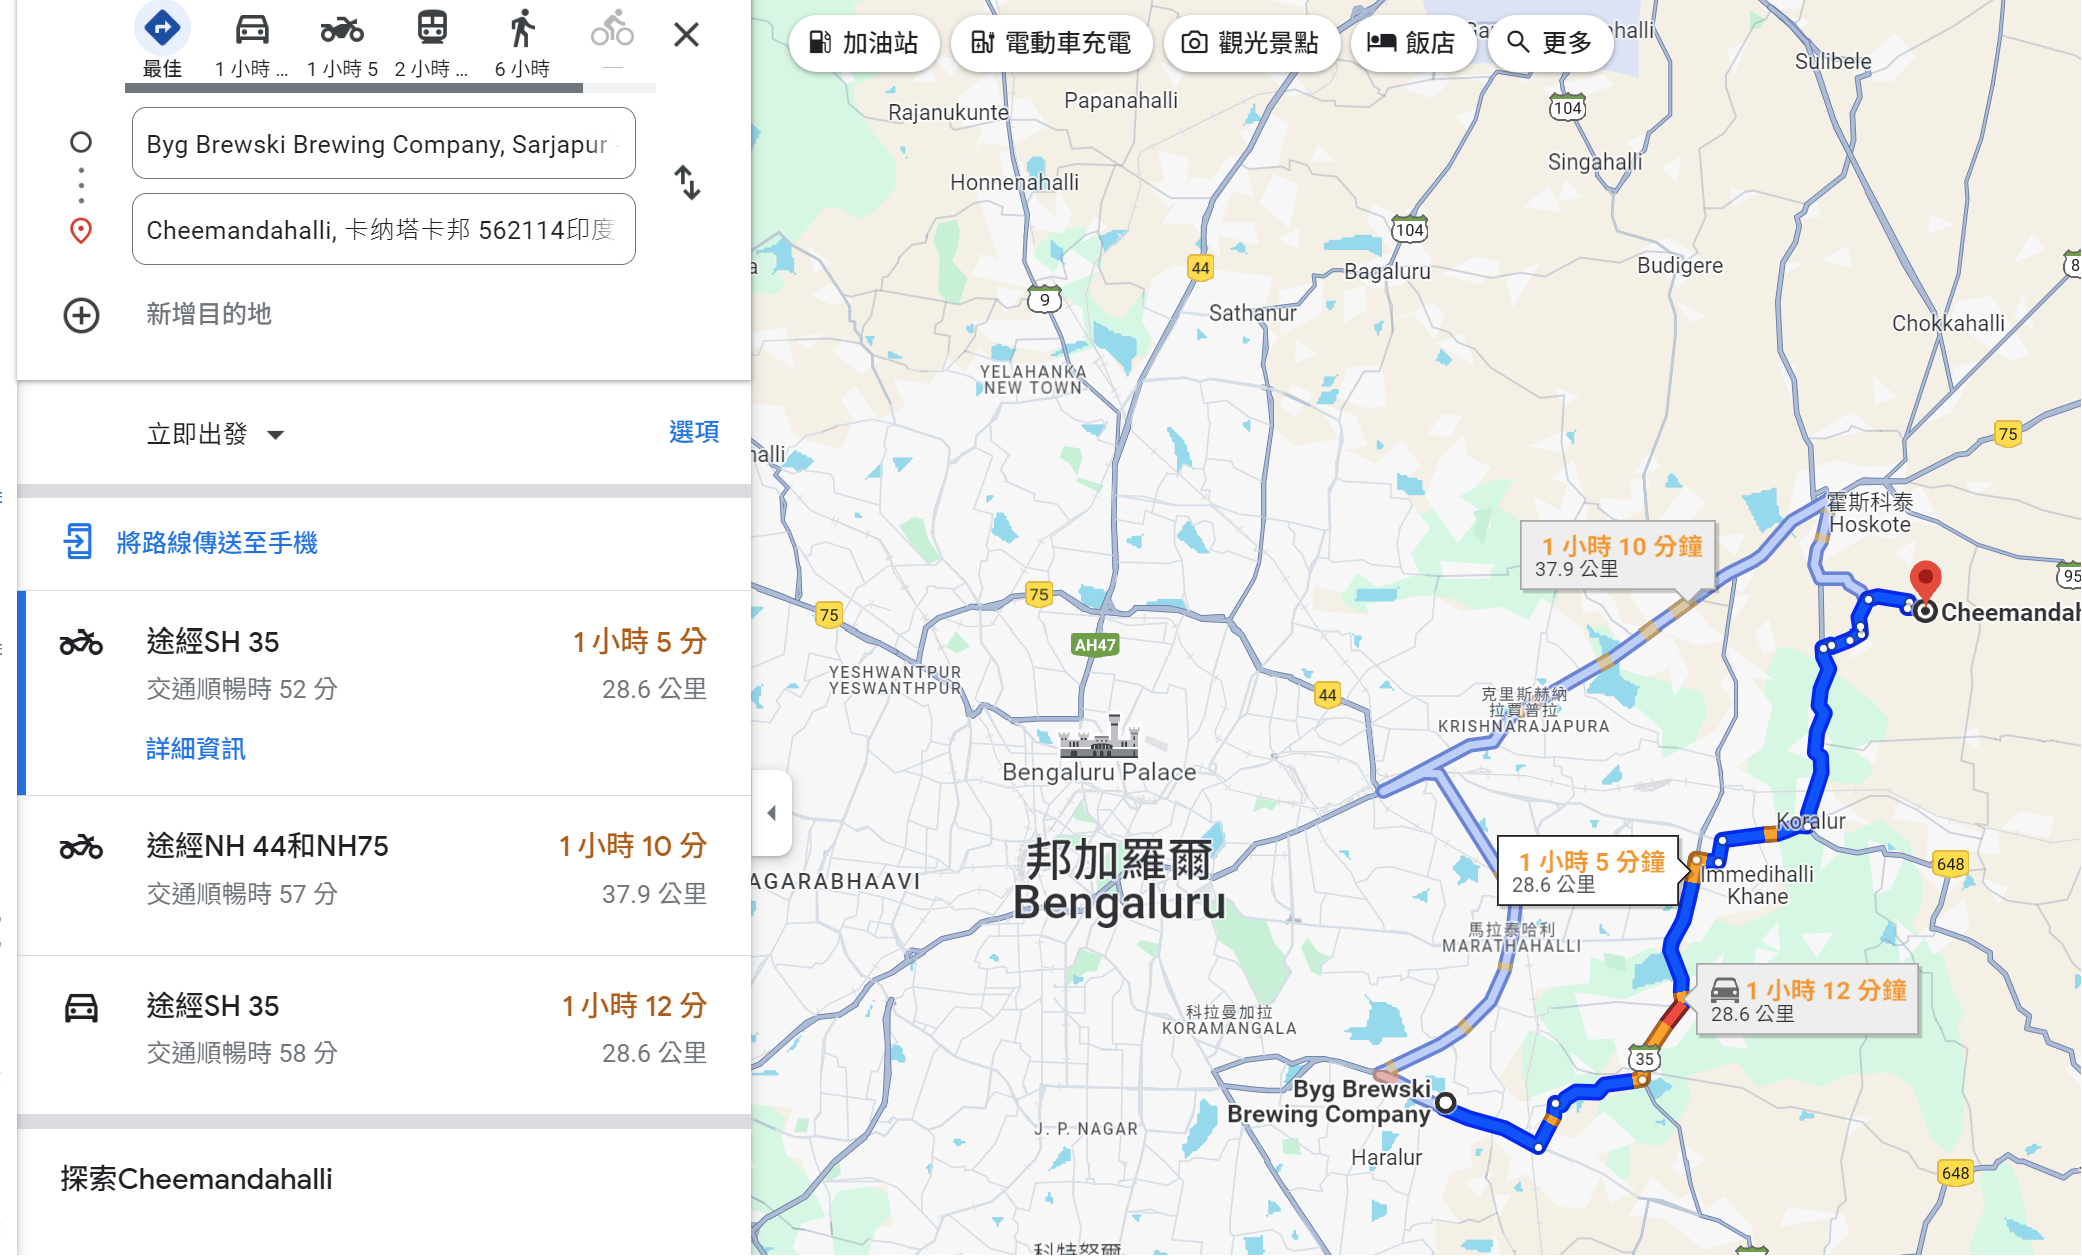

In [4]:
import requests

def get_route_distance(start, end):
    # 構建請求URL
    url = f"http://router.project-osrm.org/route/v1/car/{start[1]},{start[0]};{end[1]},{end[0]}?overview=false"

    # 發送請求
    response = requests.get(url)

    # 解析JSON數據
    data = response.json()

    # 返回路徑的距離
    return data['routes'][0]['distance'] / 1000  # 轉換成公里

# 起點和終點經緯度
start_coords = (12.311072, 76.654878)
end_coords = (12.351072, 76.694878)

# 獲取距離
distance = get_route_distance(start_coords, end_coords)
print(distance, "公里")


10.1464 公里


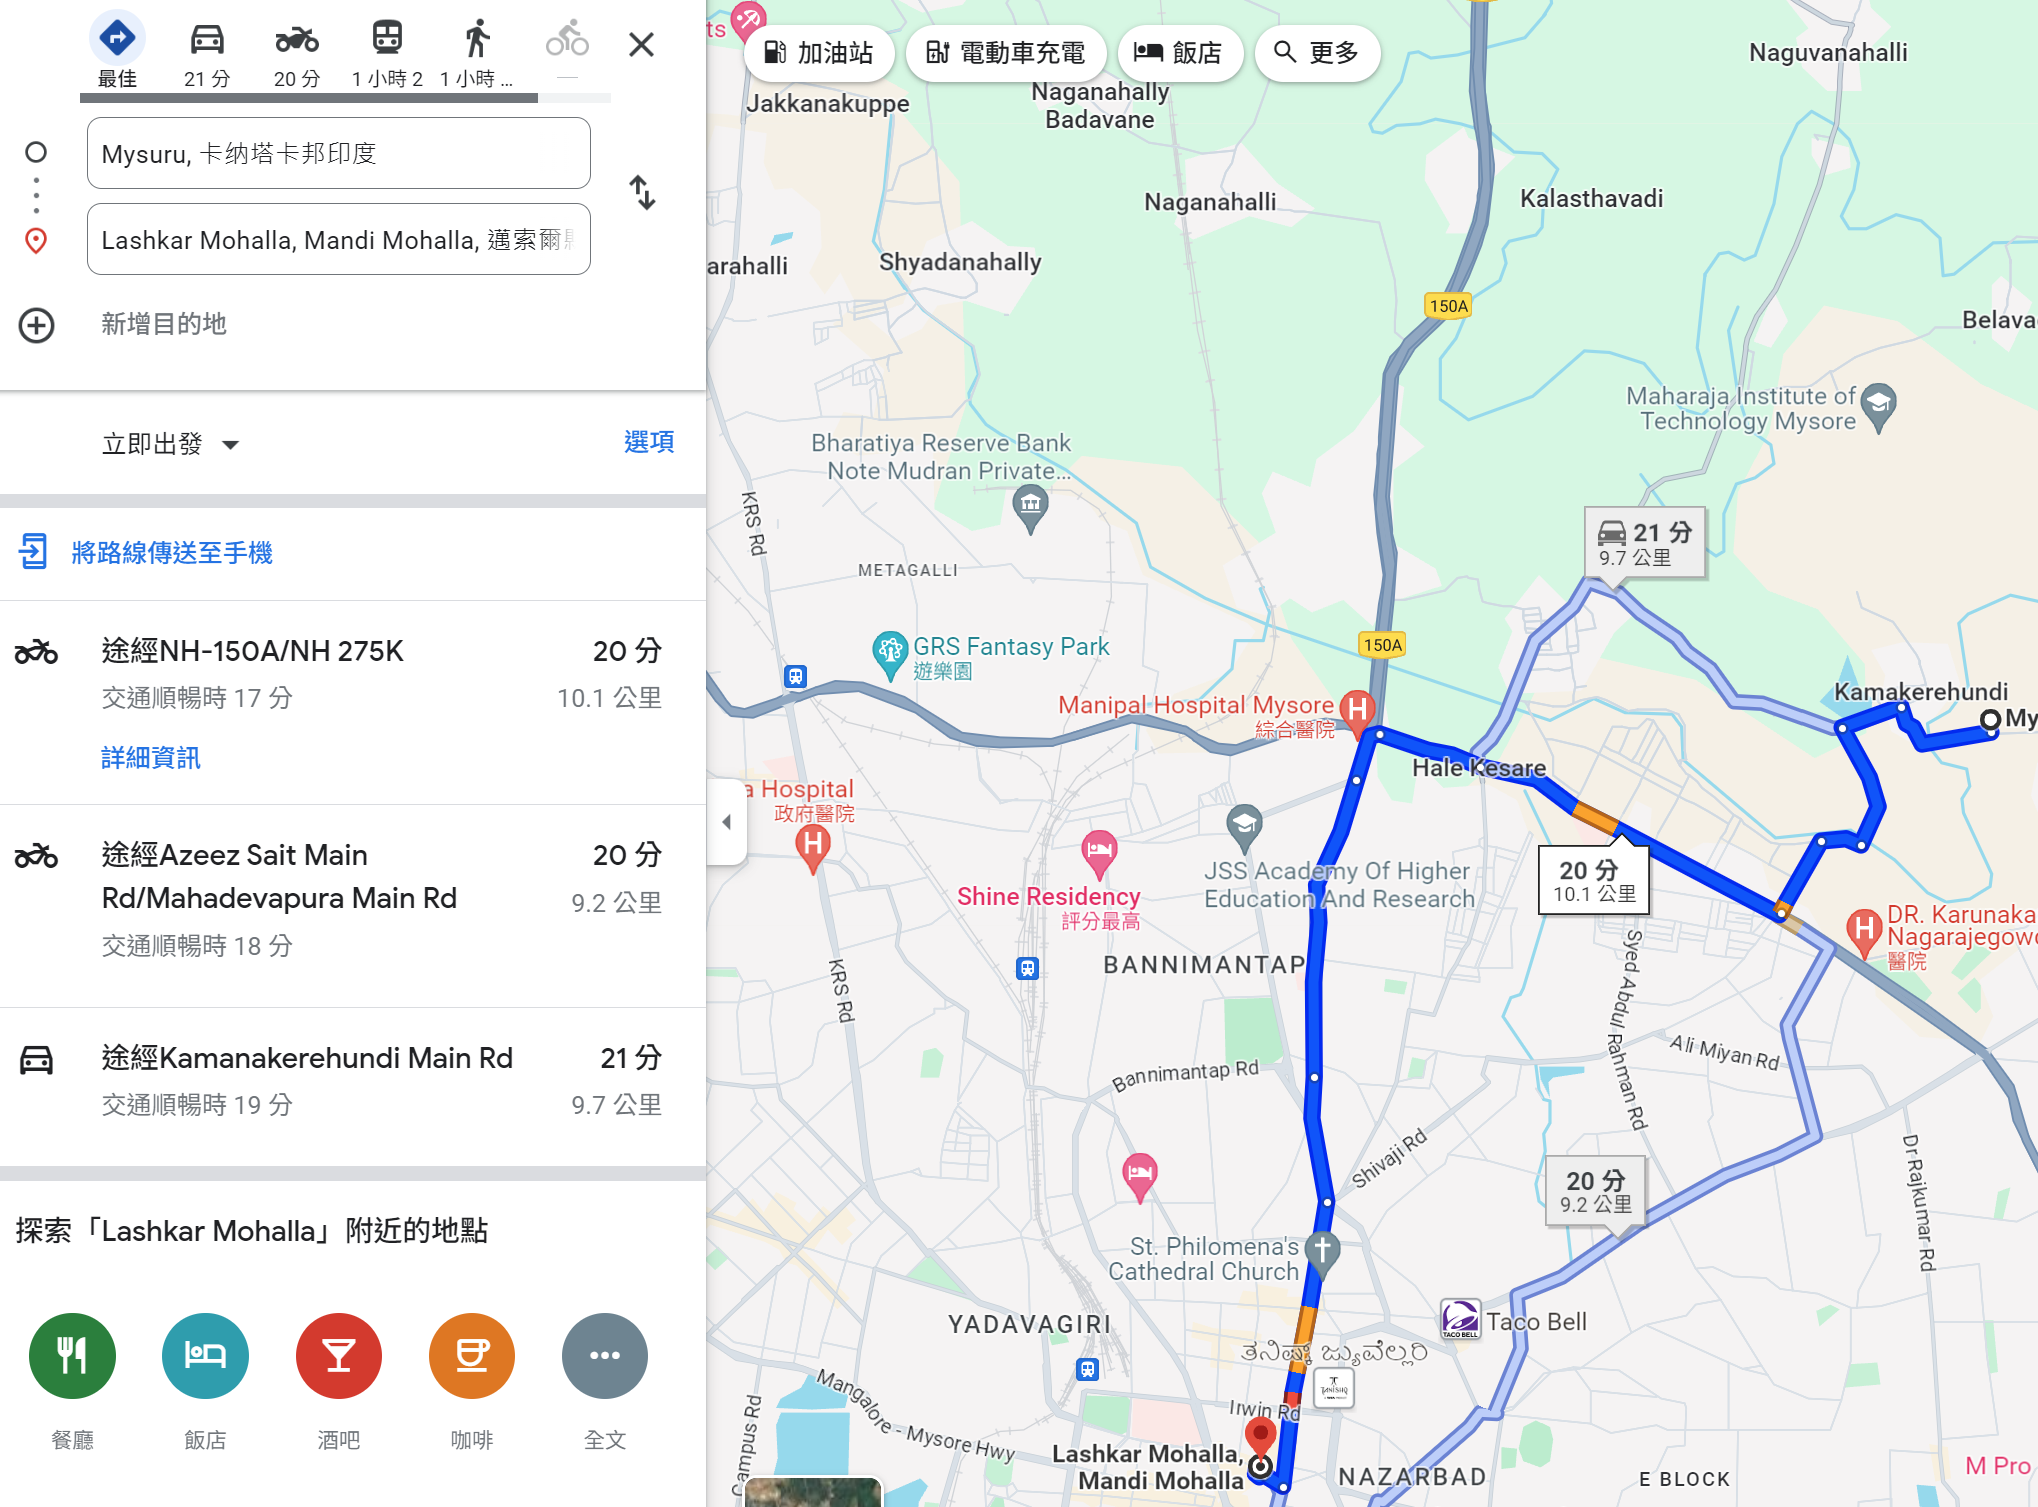

In [8]:
import requests
import folium
!pip install polyline
import polyline

def get_route(start, end):
    # 構建請求URL
    url = f"http://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}?overview=full"

    # 發送請求
    response = requests.get(url)

    # 解析JSON數據
    data = response.json()

    # 解碼 Polyline
    route_polyline = data['routes'][0]['geometry']
    route = polyline.decode(route_polyline)

    # 轉換坐標格式（如果需要）
    route = [[lat, lon] for lat, lon in route]

    return route

# 起點和終點的經緯度
start_coords = [12.311072, 76.654878]
end_coords = [12.351072, 76.694878]

# 獲取路徑
route = get_route(start_coords, end_coords)

# 創建一個地圖對象，中心設定為起點
m = folium.Map(location=start_coords, zoom_start=13)

# 繪製路線
folium.PolyLine(route, color='blue', weight=2.5, opacity=1).add_to(m)

# 顯示地圖
m


[[12.31091, 76.65488], [12.31091, 76.65488], [12.31091, 76.65496], [12.31088, 76.65504], [12.31083, 76.6551], [12.31076, 76.65513], [12.31068, 76.65514], [12.31061, 76.65513], [12.31054, 76.65509], [12.31017, 76.65569], [12.30989, 76.65615], [12.30895, 76.656], [12.30888, 76.65646], [12.30838, 76.65905], [12.30838, 76.65916], [12.30841, 76.65923], [12.30845, 76.65929], [12.30855, 76.6594], [12.30858, 76.65939], [12.30926, 76.65911], [12.30936, 76.65907], [12.30969, 76.65891], [12.30996, 76.65879], [12.31023, 76.65865], [12.31049, 76.65865], [12.3108, 76.65867], [12.31112, 76.65872], [12.3114, 76.65876], [12.31168, 76.65876], [12.31175, 76.65876], [12.31351, 76.65899], [12.31367, 76.65902], [12.31369, 76.659], [12.31372, 76.65899], [12.31375, 76.65898], [12.31379, 76.65898], [12.31385, 76.659], [12.31389, 76.65906], [12.31446, 76.65913], [12.31555, 76.65924], [12.31618, 76.65926], [12.3166, 76.6593], [12.31682, 76.65937], [12.31706, 76.65938], [12.31754, 76.65941], [12.31762, 76.65942],

In [9]:
!pip install dash dash-renderer dash-html-components dash-core-components plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 80.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-py3-none-any.whl size=1014850 sha256=d451b02f527589e677cfb2768e4a2430c6b05f4c9427e32337d10172e83d66db
  Stored in directory: /root/.cache/pip/wheels/bd/b7/17/d60d18a7b3420135dfe0ce04d361b396f32b66b75a40471bb6
Successfully built dash-renderer


In [13]:
# @title 服務器(?)
!pip install jupyter-dash requests dash-bootstrap-components polyline
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import requests
import polyline

# 使用 JupyterDash 替代 dash.Dash
app = JupyterDash(__name__)

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import requests
import polyline

app = dash.Dash(__name__)

def get_route(start, end):
    url = f"http://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}?overview=full"
    response = requests.get(url)
    data = response.json()

    route_polyline = data['routes'][0]['geometry']
    route = polyline.decode(route_polyline)
    route = [[lat, lon] for lat, lon in route]

    return route

start_coords = [12.311072, 76.654878]
end_coords = [12.351072, 76.694878]
route = get_route(start_coords, end_coords)

app.layout = html.Div([
    dcc.Graph(id='map'),
    dcc.Interval(
            id='interval-component',
            interval=1*1000, # in milliseconds
            n_intervals=0
        )
])

@app.callback(
    Output('map', 'figure'),
    [Input('interval-component', 'n_intervals')]
)
def update_map(n):
    # 模拟汽车行驶：每次回调移动到路线的下一个点
    idx = n % len(route)
    current_location = route[idx]

    fig = go.Figure(go.Scattermapbox(
        mode = "lines+markers",
        lon = [point[1] for point in route],
        lat = [point[0] for point in route],
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')
    ))

    # 添加模拟汽车的标记
    fig.add_trace(go.Scattermapbox(
        mode = "markers",
        lon = [current_location[1]],
        lat = [current_location[0]],
        marker = {'size': 14, 'color':"red"}
    ))

    fig.update_layout(
        margin ={'l':0,'t':0,'b':0,'r':0},
        mapbox = {
            'center': {'lon': current_location[1], 'lat': current_location[0]},
            'style': "stamen-terrain",
            'zoom': 13
        }
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


# 运行服务器
app.run_server(mode='inline')


  Using cached jupyter_dash-0.4.2-py3-none-any.whl (23 kB)
  Using cached dash_bootstrap_components-1.5.0-py3-none-any.whl (221 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


/usr/local/lib/python3.10/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import requests
import polyline

app = dash.Dash(__name__)

def get_route(start, end):
    url = f"http://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}?overview=full"
    response = requests.get(url)
    data = response.json()

    route_polyline = data['routes'][0]['geometry']
    route = polyline.decode(route_polyline)
    route = [[lat, lon] for lat, lon in route]

    return route

start_coords = [12.311072, 76.654878]
end_coords = [12.351072, 76.694878]
route = get_route(start_coords, end_coords)

app.layout = html.Div([
    dcc.Graph(id='map'),
    dcc.Interval(
            id='interval-component',
            interval=1*1000, # in milliseconds
            n_intervals=0
        )
])

@app.callback(
    Output('map', 'figure'),
    [Input('interval-component', 'n_intervals')]
)
def update_map(n):
    # 模拟汽车行驶：每次回调移动到路线的下一个点
    idx = n % len(route)
    current_location = route[idx]

    fig = go.Figure(go.Scattermapbox(
        mode = "lines+markers",
        lon = [point[1] for point in route],
        lat = [point[0] for point in route],
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')
    ))

    # 添加模拟汽车的标记
    fig.add_trace(go.Scattermapbox(
        mode = "markers",
        lon = [current_location[1]],
        lat = [current_location[0]],
        marker = {'size': 14, 'color':"red"}
    ))

    fig.update_layout(
        margin ={'l':0,'t':0,'b':0,'r':0},
        mapbox = {
            'center': {'lon': current_location[1], 'lat': current_location[0]},
            'style': "stamen-terrain",
            'zoom': 13
        }
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>